# Machine Learning

***

In [1]:
import pandas as pd
import numpy as np
# warning을 무시한다는 뜻입니다. - 킬러조-
import warnings
warnings.filterwarnings('ignore')

## 인코딩 - 더미 & 라벨 인코딩

#### 범주형 변수를 처리하는 방법

- 더미 인코딩 : 해당 범주인 경우 1 그렇지 않은 경우 0으로 처리, 범주 개수가 많으면 column이 많이 늘어남

In [2]:
name = ['한국', '한국', '미국', '일본', '프랑스']

In [3]:
nation = pd.DataFrame(name, columns = ['국가'])

In [4]:
nation

,국가
0,한국
1,한국
2,미국
3,일본
4,프랑스


In [5]:
n = pd.get_dummies(columns = ['국가'], data = nation)
#알아서 중복을 제거한다.

In [6]:
n

,국가_미국,국가_일본,국가_프랑스,국가_한국
0,0,0,0,1
1,0,0,0,1
2,1,0,0,0
3,0,1,0,0
4,0,0,1,0


기준점을 정해서 컬럼의 수를 줄이고 싶다면

In [8]:
n = pd.get_dummies(columns = ['국가'], data = nation, drop_first = True, )
# 첫번째 컬럼을 사라지게 하기!

In [9]:
n

,국가_일본,국가_프랑스,국가_한국
0,0,0,1
1,0,0,1
2,0,0,0
3,1,0,0
4,0,1,0


- 레이블 인코딩 : 모든 범주형 변수를 숫자 값으로 변환해준다. 숫자의 크고 작음의 문제를 해결 할 수 없다. 회귀의 경우는 사용할만한 방법

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
encoder = LabelEncoder()
# encoder를 만들고 fit을 하고 tranform을 해준다. (컬럼)

In [12]:
encoder.fit(nation['국가'])

LabelEncoder()

In [13]:
label = encoder.transform(nation['국가'])

In [15]:
nation.국가

0     한국
1     한국
2     미국
3     일본
4    프랑스
Name: 국가, dtype: object

In [14]:
label #라벨링을 해준다.

array([3, 3, 0, 1, 2])

In [16]:
nation['labeld_nation'] = label #라벨링한 것을 새로운 변수로 만들어줌

In [17]:
nation

,국가,labeld_nation
0,한국,3
1,한국,3
2,미국,0
3,일본,1
4,프랑스,2


In [ ]:
encoder.inverse_transform(nation['labeld_nation'])
# 역으로 해주는거 : 라벨링(숫자) => 변수 이름으로  

array(['한국', '한국', '미국', '일본', '프랑스'], dtype=object)

## 데이터 검증 방법 - sklearn의 model_selection 이용

### 1. Hold Out 교차 검증(train test split)
- train & test 분리
- 일반적인 학습 및 검증 데이터 분리
- 7:3 혹은 8:2 등 다양한 비율을 직접 정할 수 있다.

In [22]:
from sklearn.datasets import load_breast_cancer
# sklearn에 있는 데이터 가져오기 

data = pd.DataFrame(load_breast_cancer().data, columns = load_breast_cancer().feature_names)
# 데이터 프레임으로 바꾸기 

data['target'] = load_breast_cancer().target
# target : 종속변수 (예측하려는 변수)

In [20]:
data2 = pd.DataFrame(load_breast_cancer().data)
data2.head()
#columns을 추가하지 않으면 columns명이 적용되지 않는다.

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [23]:
data = pd.read_csv('telco_cus_churn.csv')

In [30]:
data.head()
data['Churn'].sample(11)
# classification => 1. RandomForest 2. RandomRegressor 3. LogisticRegression 4. AdaBoost 5. 사실 회귀를 써도 된다. => 모든 모델 다 가능! 

2408     No
6091    Yes
3651     No
1199     No
5172     No
2314     No
13      Yes
2806     No
763      No
5517     No
2252     No
Name: Churn, dtype: object

In [26]:
from sklearn.model_selection import train_test_split
# 랜덤으로 train과 test를 나눠주는 함수!

순서는 학습용 독립변수, 검증용 독립변수, 학습용 종속변수, 검증용 종속변수 = train_test_split(독립변수, 종속변수, test_size = 검증용 데이터 비율, random_state = 시드, shuffle = 섞기 여부, stratify = 층화추출 대상 컬럼)

회귀의 경우 층화추출을 하지 않지만 분류의 경우 각 클래스별 비중을 고려하기 위해 stratify = 종속변수를 설정한다.

In [25]:
X = data.iloc[:, 1:-1] # 독립변수
y = data['Churn'] # 종속변수

In [31]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y, shuffle = True)
# pythonic한 문법을 이용하여 split을 해준다. 1. train 독립 2. val 독립 3. train 종속 4. val 종속 
# stratify = y : 종속변수가 한쪽으로 안쏠리게 해줌

분류이기 때문에 stratify = y로 설정한다.

In [32]:
y_train.value_counts() / y_train.shape[0]
# 비율을 보게 해주는 함수 

No     0.734647
Yes    0.265353
Name: Churn, dtype: float64

In [33]:
y_val.value_counts() / y_val.shape[0]
# train과 val 이 비슷한 비율로 나눠진것을 볼 수 있다.!

No     0.734564
Yes    0.265436
Name: Churn, dtype: float64

학습 및 검증 데이터 종속변수의 클래스 비율이 유사한 것을 알 수 있다.
***
### 2. 교차검증

#### 2-1. cross_val_score

별도로 학습 및 검증용 데이터를 분할하지 않고 사용이 가능하다.

말그대로 데이터를 cross하며 validation score를 측정하는 것이다.

파라미터 튜닝이나 모델의 성능을 확인하고 싶을 때 사용한다.

In [54]:
from sklearn.datasets import load_boston
from IPython.display import Image 

In [35]:
bs = load_boston()

In [52]:
data = pd.DataFrame(bs.data, columns = bs.feature_names)
data['target'] = bs.target

In [37]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [38]:
b_X = data.iloc[:, :-1]
b_y = data.iloc[:, -1]
# 종속 변수 독립 변수 나누기

In [39]:
from sklearn.ensemble import RandomForestRegressor
# 여기 있는거 외우자 

In [53]:
rf = RandomForestRegressor(random_state = 42)
# 기본 모델 만들기 

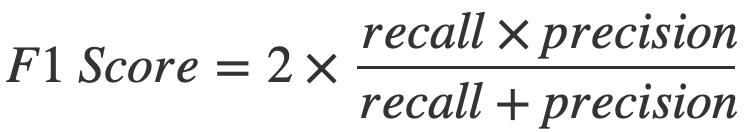

In [55]:
Image('f1score.png')

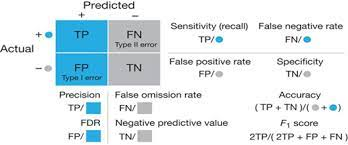

In [56]:
Image('confusionmatrix.jpg')

In [41]:
from sklearn.model_selection import cross_val_score

In [65]:
cv = cross_val_score(rf, b_X, b_y, cv = 8, scoring = 'neg_mean_absolute_error')
cv_MSE = cross_val_score(rf, b_X, b_y, cv = 8, scoring = 'neg_mean_squared_error')

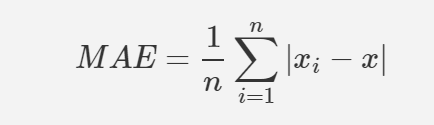

In [59]:
Image('MAE.png')

주의) 회귀의 경우 평가 지표의 값이 작을수록 좋은 성능이다. ex> RMSE, MAE 등등

따라서 scoring이라는 인자에 회귀 평가 지표를 사용할 경우 앞에 "neg_"를 붙여준다. 음수로 환산했을 때 값이 클수록 좋기 때문이다.

In [66]:
cv

array([-2.49657812, -1.36517187, -3.2778254 , -2.50893651, -3.10949206,
       -4.52595238, -4.3141746 , -2.46950794])

In [67]:
cv_MSE

array([ -9.78492611,  -4.60572083, -18.68974205, -10.32260163,
       -21.49484213, -68.87485376, -28.59971316, -11.26100287])

각 iteration 별로 mae값을 출력한다. 전체 성능을 알기 위해서는 평균을 취해준다.

In [68]:
abs(cv.mean())

3.008454861111111

모델을 8fold로 cross validation 한 결과 평균 MAE는 3이다.
***
#### 2-2. KFold - 앙상블에 꼭 필수적인 기법!!

학습용 데이터를 K개로 나눈 후 K-1개의 FOLD를 학습에 사용하고 1개의 FOLD를 검증용으로 사용한다.

홀드아웃에 비해 과적합에 덜 민감하다.

학습 데이터가 적다면 FOLD 개수를 늘리는 것이 좋다.

- 회귀에는 일반적인 KFold를 사용한다.
- 분류에는 StratifiedKFold를 사용한다.

In [45]:
 # 주피터 노트북에 이미지 삽입

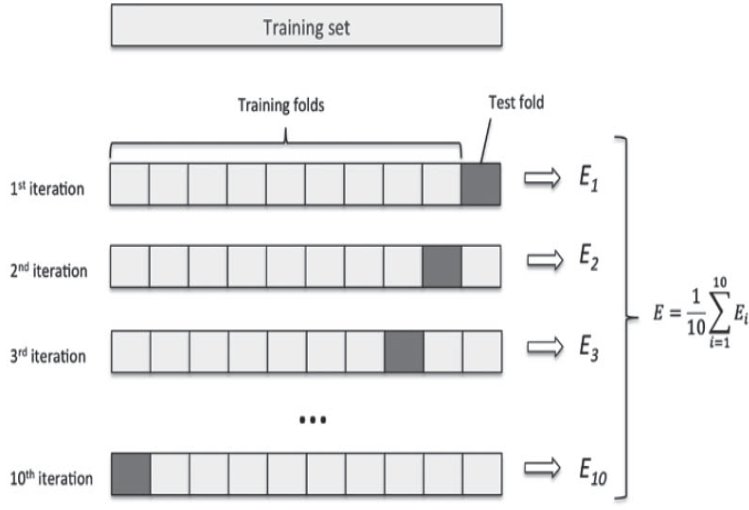

In [69]:
Image('kfold.png')

출처 : https://jinnyjinny.github.io/deep%20learning/2020/04/02/Kfold/

In [47]:
from sklearn.model_selection import KFold, StratifiedKFold

In [95]:
kf = KFold(n_splits = 5, random_state = 42, shuffle = True)
# 

In [96]:
kf.split(b_X, b_y)

<generator object _BaseKFold.split at 0x7f4576f657d0>

In [97]:
cv = cross_val_score(rf, b_X, b_y, cv = kf, scoring = 'neg_mean_absolute_error')

In [98]:
cv

array([-2.08291176, -2.09689109, -2.58248515, -2.20868317, -2.00142574])

In [99]:
cv.mean()

-2.1944793826441464

***

In [100]:
skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)

In [101]:
skf.split(X, y)

<generator object _BaseKFold.split at 0x7f45770ea8d0>

In [111]:
X[X.TotalCharges == ' ']
# 없는 값이 있다. 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,


In [112]:
X.TotalCharges = X.TotalCharges.str.replace(' ', '0')

In [113]:
X.TotalCharges = X.TotalCharges.astype(float) 
# 위의 코드에서 str로 바꾸었기 때문에 float으로 바꿔줌

In [114]:
X = pd.get_dummies(columns = X.columns[X.dtypes == object], data = X)
#더미 데이터 생성 

In [115]:
from lightgbm import LGBMClassifier

In [116]:
lgbm = LGBMClassifier(random_state = 42)

In [130]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

In [137]:
cv = cross_val_score(lgbm, X, y, cv = skf, scoring = 'accuracy')


In [150]:
cv2 = cross_val_score(lgbm, X, y, scoring='precision')

In [151]:
accuracy = cv.mean()
recall = cv2.mean()

In [142]:
accuracy

0.792698319246403

In [152]:
recall
#포기..

nan

In [139]:
f1 = 2*recall*accuracy/(recall+accuracy)

In [140]:
f1

nan

In [ ]:
scores = cross_val_score(model, x_data, y_data, scoring='recall')
#scores = cross_val_score(model, x_data, y_data, scoring=make_scorer(recall_score))
#scores = cross_val_score(model, x_data, y_data, scoring='precision')
#scores = cross_val_score(model, x_data, y_data, scoring=make_scorer(precision_score))
#scores = cross_val_score(model, x_data, y_data, scoring='f1')
#scores = cross_val_score(model, x_data, y_data, scoring=make_scorer(f1_score))